# **Optimizing Candidate Selection Using Recruitment Data - Exploratory Data Analysis - Hector Sanchez**

**Exploratory Data Analysis Plan/Steps:**

1. Provide an Informative Initial Data Overview

   Objective: We will explore summary statistics and basic metrics to improve our understanding of the dataset. Our summary statistics will include the mean, median, min, max, and percentiles for numerical columns. We will also verify that we don't have any missing values. While we saw that we don't have any NaN's during our Data Wrangling, we will check once more in order to avoid any errors or inconsistencies throughout the rest of the project. 
   
3. Leverage Exploratory Visualizations

   Objective: We will analyze the distribution of numerical variables by creating valuable visualizations. For example, we can plot histograms for variables such as Age, ExperienceYears, DistanceFromCompany, InterviewScore, SKillScore, and PersonalityScore. This will help us understand their spread. Similarly, we can use bar plots to analyze categorical features such as Gender, EducationLevel, and RecruitmentStrategy. 
   
5. Apply Correlation Analysis

   Objective: To analyze correlations in our numerical variables, we can use a correlation heatmap. We will primarily focus on HiringDecision so that we can see which features show possbilbe correlations/associations. 
   
7. Analyze and Inspect Feature Relationships

   Objective: To better understand how our distributions can vary based on hiring outcome, we can make use of Box Plots to copare HiringDecision against Age, ExperienceYears, InterviewScore, and other features. We should also consider analyzing HiringDecision with Gender, EducationLevel, and RecruitmentStrategy (cross tabulation).
   
9. Data Preprocessing Preparation

   Objective: In this step, we'll focus on ensuring that Gender and RecruitmentStrategy are fully encoded. We could aslo consider scaling our numerical features if they vary significantly (this would help us imporve the performance of our model if we determine that it's needed).

**Load Packages, Data, and Provide an Informative Initial Data Overview**

In [11]:
# We'll start by importing the necessary libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [12]:
# Next, we'll load the cleaned and encoded dataset

file_path = 'C:/Users/hecsa/Springboard/Springboard Github/Springboard/Data Science Capstone Three/datasets/cleaned_encoded_recruitment_data.csv'
recruitment_data_cleaned = pd.read_csv(file_path)

In [13]:
# Utlize .head() to inspect the structure of the first 5 rows of the dataset

recruitment_data_cleaned.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,HiringDecision,Strategy_Aggressive,Strategy_Moderate,Strategy_Conservative
0,26,Female,Bachelor's Type 2,0,3,26.783828,48,78,91,1,True,False,False
1,39,Female,PhD,12,3,25.862694,35,68,80,1,False,True,False
2,48,Male,Bachelor's Type 2,3,2,9.920805,20,67,13,0,False,True,False
3,34,Female,Bachelor's Type 2,5,2,6.407751,36,27,70,0,False,False,True
4,30,Male,Bachelor's Type 1,6,1,43.105343,23,52,85,0,False,True,False


In [17]:
# Utilize .info() to display the data types of each column

recruitment_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1500 non-null   int64  
 1   Gender                 1500 non-null   object 
 2   EducationLevel         1500 non-null   object 
 3   ExperienceYears        1500 non-null   int64  
 4   PreviousCompanies      1500 non-null   int64  
 5   DistanceFromCompany    1500 non-null   float64
 6   InterviewScore         1500 non-null   int64  
 7   SkillScore             1500 non-null   int64  
 8   PersonalityScore       1500 non-null   int64  
 9   HiringDecision         1500 non-null   int64  
 10  Strategy_Aggressive    1500 non-null   bool   
 11  Strategy_Moderate      1500 non-null   bool   
 12  Strategy_Conservative  1500 non-null   bool   
dtypes: bool(3), float64(1), int64(7), object(2)
memory usage: 121.7+ KB


In [19]:
# Utilize .describe() to display the basic summary statistics of our cleaned and encoded recruitment data

recruitment_data_cleaned.describe()

,Age,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,HiringDecision
count,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,0.310000
std,9.252728,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.462647
min,20.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,0.000000
25%,27.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,0.000000
50%,35.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,0.000000
75%,43.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,1.000000
max,50.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,1.000000


In [21]:
# Utlize .isnull().sum() to check our data for any null values or inconsistencies

recruitment_data_cleaned.isnull().sum()

Age                      0
Gender                   0
EducationLevel           0
ExperienceYears          0
PreviousCompanies        0
DistanceFromCompany      0
InterviewScore           0
SkillScore               0
PersonalityScore         0
HiringDecision           0
Strategy_Aggressive      0
Strategy_Moderate        0
Strategy_Conservative    0
dtype: int64

Upon loading our cleaned and encoded dataset, we made use of the following methods/functions:
  - **.head()** to view the first 5 rows of the dataset.
  - **.info()** to view the data types of each column.
  - **.describe()** to view basic summary statistics of each numerical column.
  - **.isnull().sum()** to check for any remaining null values or inconsistences in teh data.

The results above indicate that the work from our Data Wrangling has translated well into this next EDA step.

The code mapping that we applied to the "Gender," "EducationLevel," and "RecruitmentStrategy" columns remains in effect. Rather than having binary, or numerical values in these columns, we now have text values that makes that data/values easier to interpret.

We verified that we don't have any null values, and it appears that on average, less people are hired than they are hired based on the summary statistics that we generated. The mean gives us a basic, but important initial understanding of the candidates that are represented in thie dataset. We will continue to analyze other results/statistics as we proceed, but it's worth noting that our average candidate is about 35 years old, our youngest candidate is 20 years old, and our oldest candiate is 50 years old. Therefore, we're working with candidates that are either young or midle aged (our data does not contain results on "older" candidates).

**Leverage Exploratory Visualizations**

Distribution of Numerical Columns via Histograms

In [23]:
# Create a list that contains all numerical columns

numerical_columns = ['Age', 'ExperienceYears', 'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore']

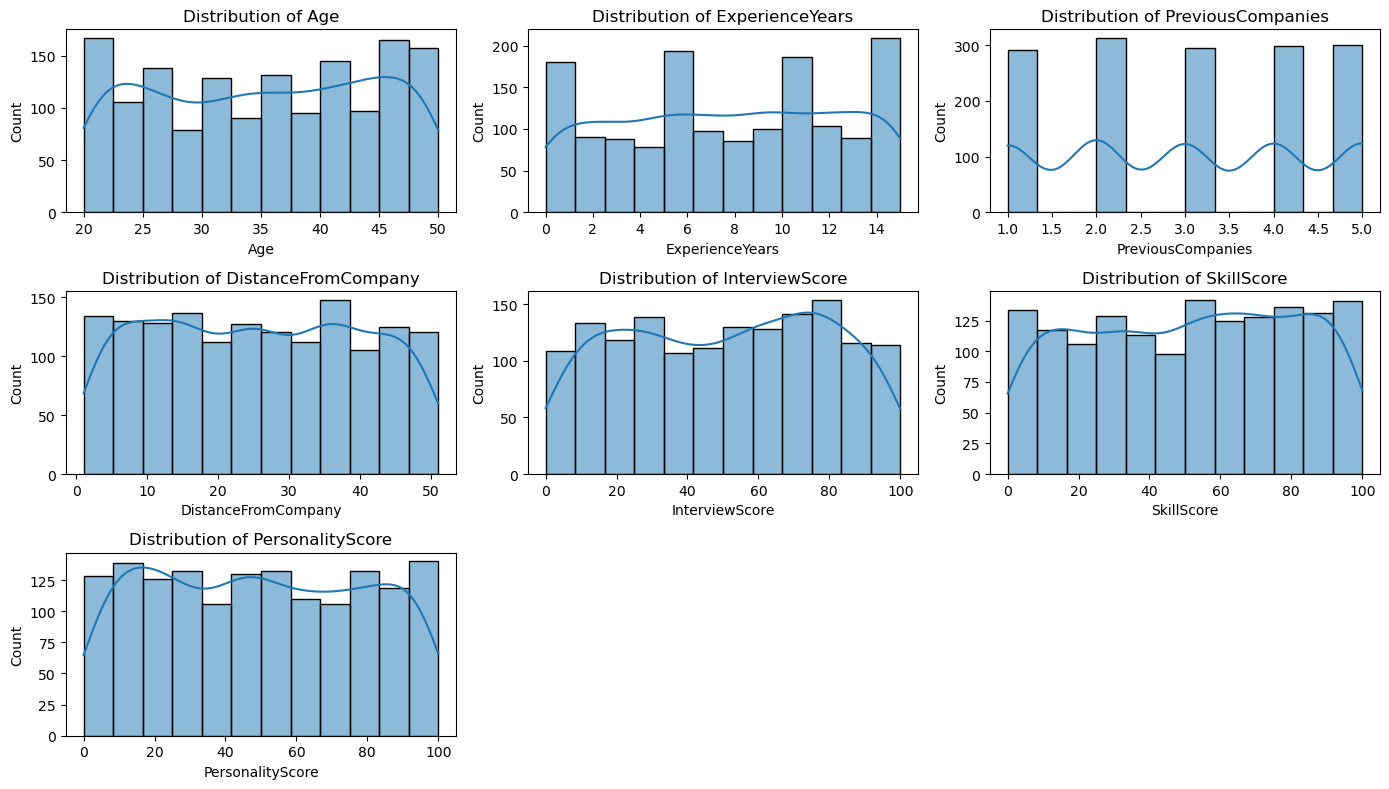

In [25]:
# Plot our Histograms

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(recruitment_data_cleaned[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

The histograms that are shown above simply give us a more clear view of how our candidates are distributed based on each numerical feature. Most features seem to be evenly distributed for the most part, with PreviousCompanies being the most inconsistent (presumably because this feature is represented by whole numbers/integers. It'd be odd to say that a person has worked at 2 and a half different companeis before).

Categorical Feature Analysis via Bar Plots

In [27]:
# Create a list that contains our categorical features

categorical_columns = ['Gender', 'EducationLevel', 'Strategy_Aggressive', 'Strategy_Moderate', 'Strategy_Conservative']

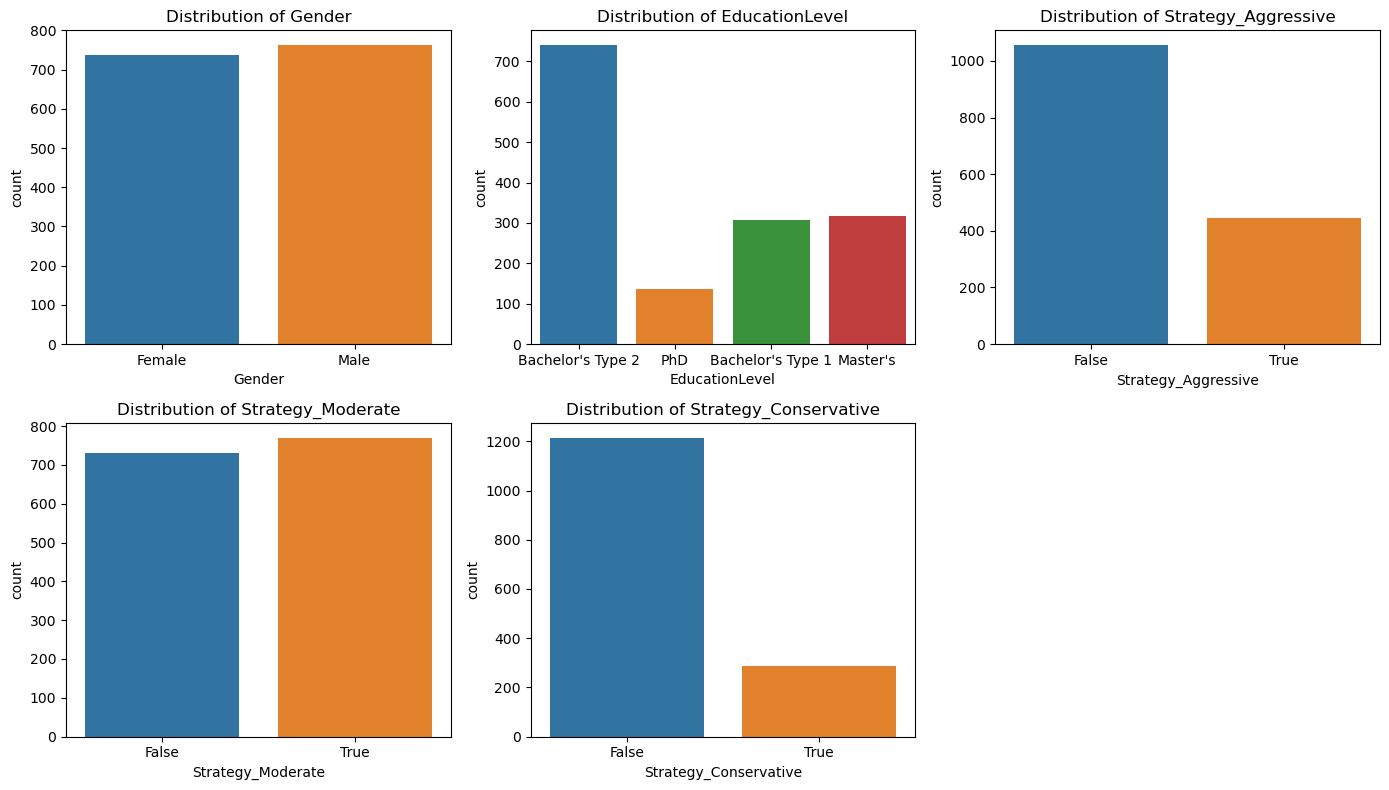

In [29]:
# Plot our Bar Plots

plt.figure(figsize=(14, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, data=recruitment_data_cleaned)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Similar to what we did with our histograms, the bar plots above give us a better idea of how our categorical features are distributed. Some quick key obervations from these bar plots are:
- The vast majority of our candidates have a Bachelor's Type 2.
- The most used RecruitmentStrategy was 'Strategy_Moderate'.
- We have more male candidates, but only slightly, otherwise the gender gap is quite small.

**Apply Correlation Analysis**

Our goal with this correlation analysis is to apply and visualize the Pearson correlation coefficient between the numerical features that are in our dataset. Doing so will generate a correlation matrix, however, we need to finish encnoding the rest of our non-numerical features ('Gender', and 'EducationLevel'). 

In [31]:
# One hot encode 'Gender' and 'EducationLevel' to convert them into a numerical format
# We incldued drop_first=True to avoid multicolinearity and possible overfitting in the future. This is an attempt to reduce dimensionality.

recruitment_data_encoded = pd.get_dummies(recruitment_data_cleaned, columns=['Gender', 'EducationLevel'], drop_first=True)

In [33]:
# Utilize .corr() to compute a correlation matrix

corr_matrix = recruitment_data_encoded.corr() 
print(corr_matrix)

                                       Age  ExperienceYears  \
Age                               1.000000         0.024780   
ExperienceYears                   0.024780         1.000000   
PreviousCompanies                -0.032580         0.015784   
DistanceFromCompany              -0.021031         0.007920   
InterviewScore                   -0.025579        -0.051701   
SkillScore                       -0.008068         0.006323   
PersonalityScore                  0.037727         0.013891   
HiringDecision                    0.001850         0.122494   
Strategy_Aggressive               0.005656        -0.045871   
Strategy_Moderate                -0.035253         0.043011   
Strategy_Conservative             0.038330        -0.001388   
Gender_Male                      -0.011286         0.028502   
EducationLevel_Bachelor's Type 2  0.001728        -0.024302   
EducationLevel_Master's          -0.006025         0.000353   
EducationLevel_PhD                0.037346         0.01

The correlation matrix that is shown above properly displays how each feature correlates with the others on a scale from -1 to 1:
 -  **1** indicates a perfect positive(they are correlated) correlation between features
 -  **0** indicates that there is no correlations between features
 -  **-1** indicates a perfect negative(they are not correlated) correlation between features

In [35]:
# Call .head() on the newly encoded dataset to view the changes before creating a heatmap

recruitment_data_encoded.head()

,Age,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,HiringDecision,Strategy_Aggressive,Strategy_Moderate,Strategy_Conservative,Gender_Male,EducationLevel_Bachelor's Type 2,EducationLevel_Master's,EducationLevel_PhD
0,26,0,3,26.783828,48,78,91,1,True,False,False,False,True,False,False
1,39,12,3,25.862694,35,68,80,1,False,True,False,False,False,False,True
2,48,3,2,9.920805,20,67,13,0,False,True,False,True,True,False,False
3,34,5,2,6.407751,36,27,70,0,False,False,True,False,True,False,False
4,30,6,1,43.105343,23,52,85,0,False,True,False,True,False,False,False


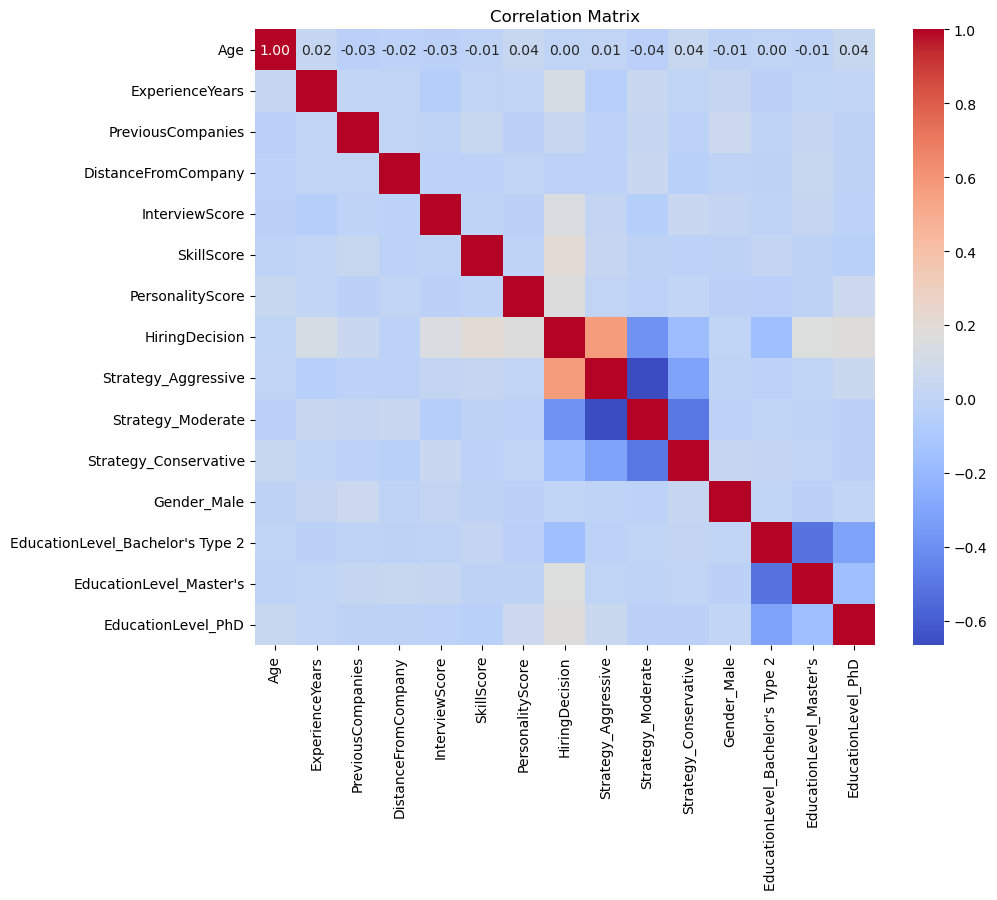

In [37]:
# Plot our Correlation Heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The values that are shown in the correlation matrix, and the heatmap are the Pearson correlation coefficients, which utlimately provides insight into the linear relationsihps between pairs of features.

Based on the heatmap, the following correlations/relationships with respet to 'HiringDecision' are apparent:
 - **Positively Corrleated:** 'Strategy_Aggressive'
 - **Slightly Postively Correlated:** 'EducationLevel_Master's', 'EducationLevel_PhD', 'InterviewScore', 'SKillScore', 'PersonalityScore', 'ExperienceYears'
 - **Negatively Correlated:** 'Strategy_Moderate', 'Strategy_Conservative', 'EducationLevel_Bachelor's Type 2

These initial observations can lead us to believe that candiates were Hired when Hiring Teams recruited Agressively, OR when candidates had a Master's or higher and performed well during interview/personality/skill assessments. 

**Analyze and Inspect Feature Relationships**

In this next step, we're going to create Box Plots for 'HiringDecision' Against Numerical Features. Since the distribution of each numerical feature will be displayed in relation to HiringDecisoin, I'll include that the values of HiringDecision represent since it's binary.

**HiringDecision:**
- **0: Not Hired**
- **1: Hired**

In [39]:
# Create a list that contains the numerical columns. We will use this list to compare the columns to HiringDecision

relationship_columns = ['Age', 'ExperienceYears', 'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore']

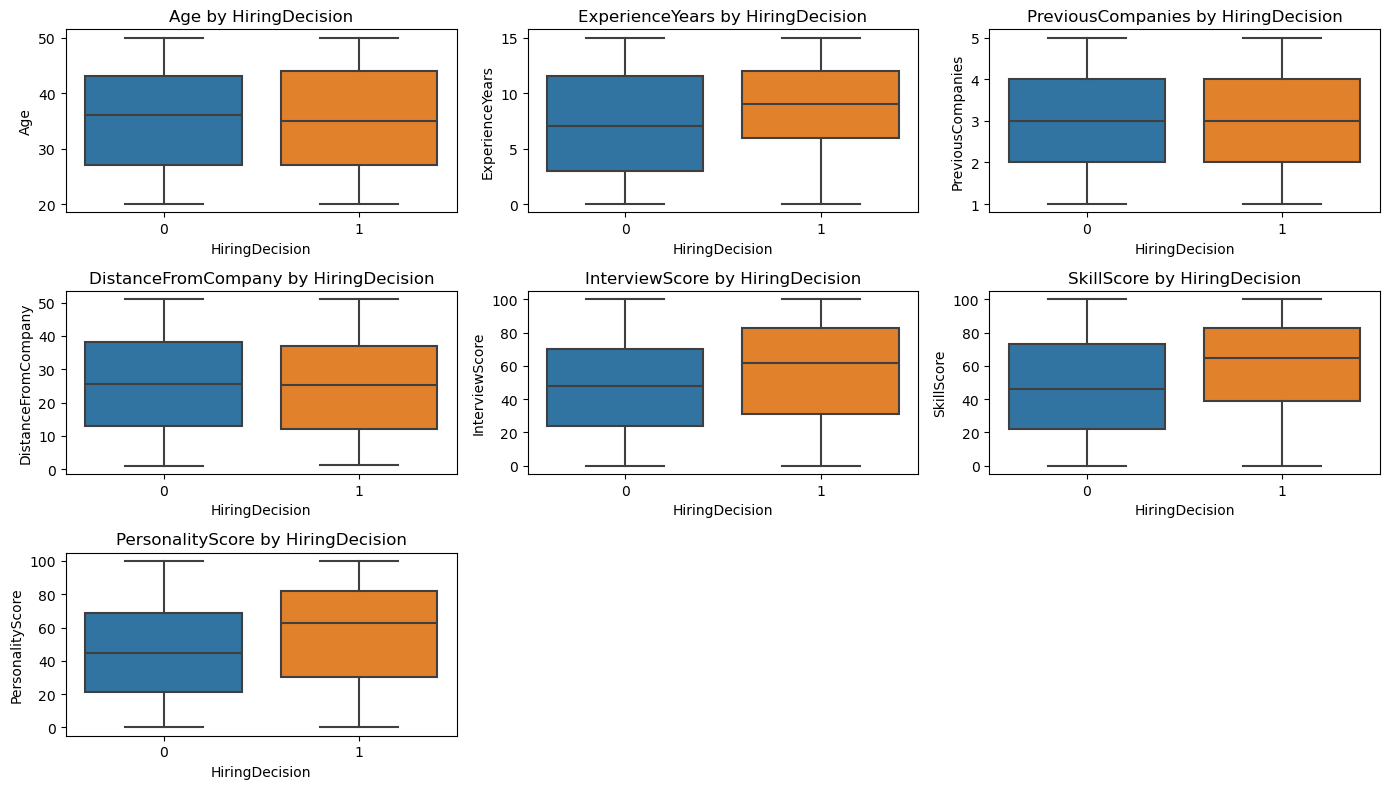

In [41]:
# Plot our Box Plots

plt.figure(figsize=(14, 8))
for i, col in enumerate(relationship_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='HiringDecision', y=col, data=recruitment_data_encoded)
    plt.title(f'{col} by HiringDecision')
plt.tight_layout()
plt.show()

By creating the Box Plots that are shown above, we are able to see the distribution of hiring outcomes based on each individual numerical feature that is in our dataset. Based on these Box Plots only, it seems that Interview/Personality/Skill Score have the most visible impact on someone being hired or not. The hiring outcomes based on our other numerical features seem to be mostly evenly distritbuted, so it's harder to see their impact on HiringDecision baed on just what we see in our Box Plots. 

Cross Tabulation for Categorical Features with HiringDecision

We will analyze how each of our categorical columns related to HiringDecision via the use of unstacked bar charts.

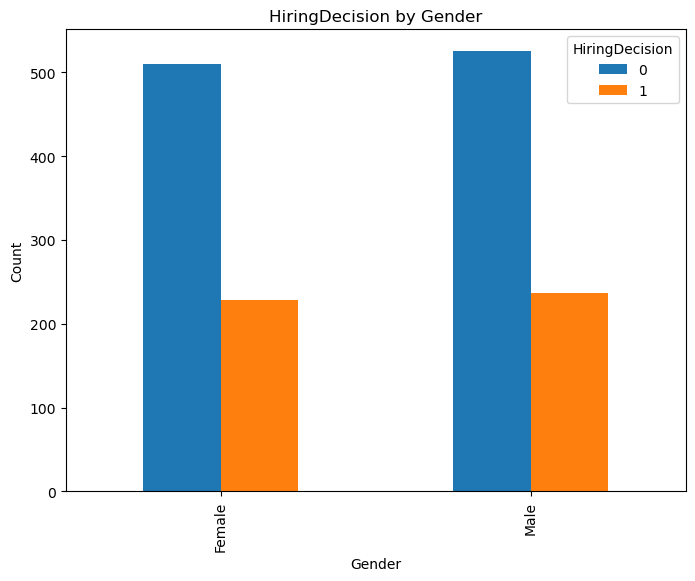

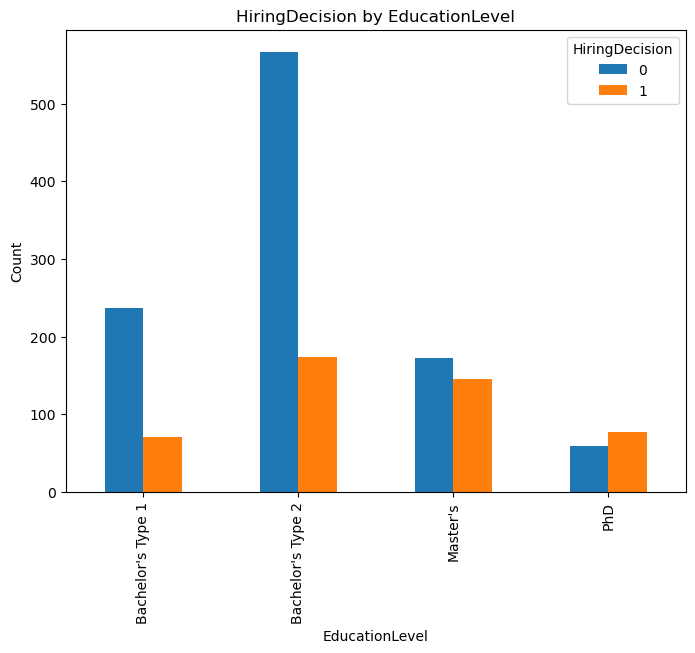

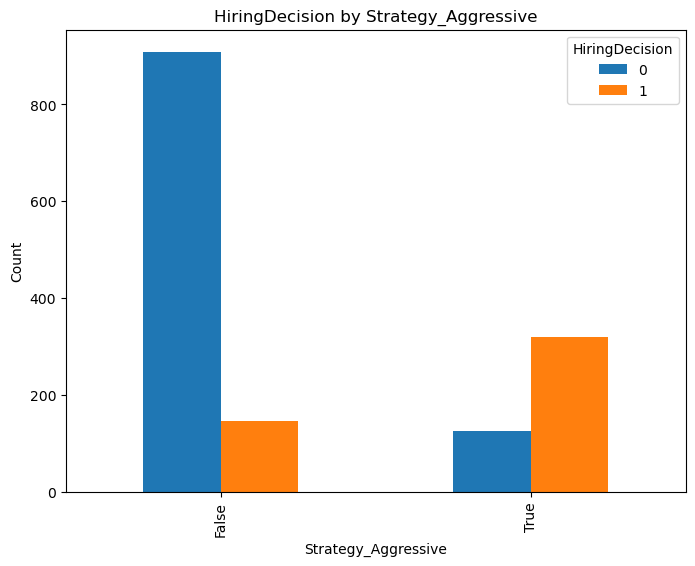

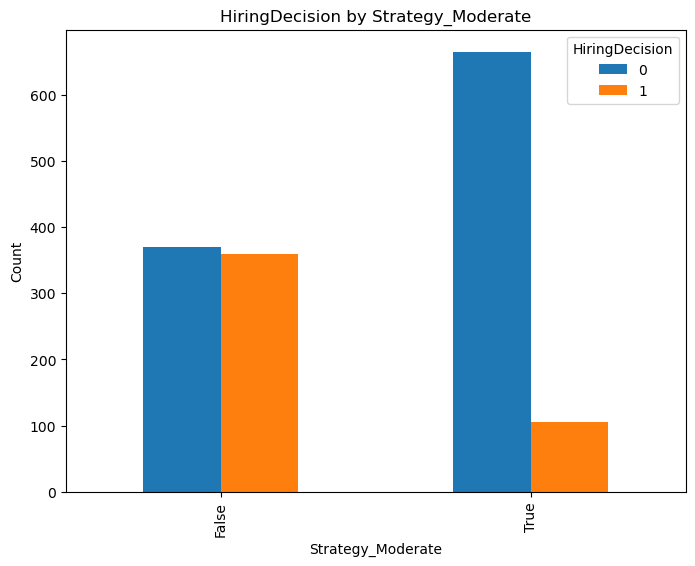

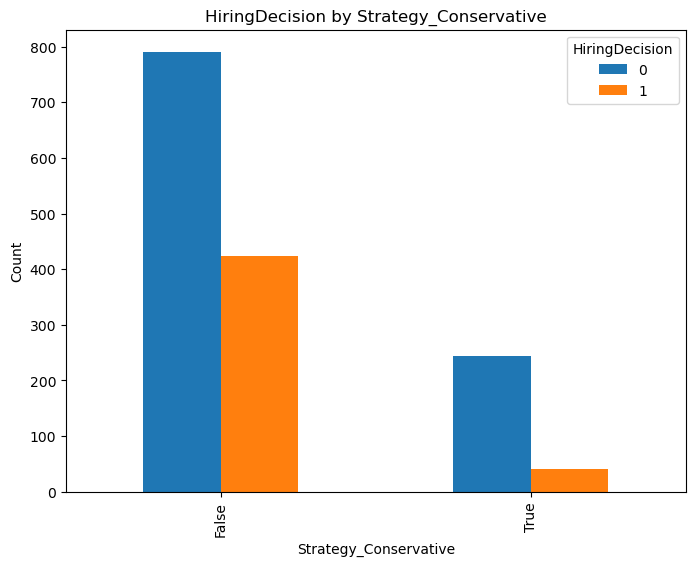

In [43]:
# Apply Cross Tabulation of HiringDecision with the categorical features

for col in categorical_columns:
    crosstab = pd.crosstab(recruitment_data_cleaned[col], recruitment_data_cleaned['HiringDecision'])
    crosstab.plot(kind='bar', stacked=False, figsize=(8, 6))
    plt.title(f'HiringDecision by {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='HiringDecision')
    plt.show()

Here are some key findings based on our cross tabulation:
- The Gender gap between Male and Female candidates is not incredibly significant, but it does seem that more Males were Hired versus Females.
- Significatnly more job offers were extended to candidates with a Bachelor's Type 2 or MAster's. Bacherlor's Type 1 and PhD candidates may be seen as underqualified or overqualified.
- An aggressive recruitment strategy resulted in the highest amount of candidates being Hired versus the moderate and conservative recruitment strategies.

**Data Preprocessing Preparation**

Encoding Categorical Variables

    Our encoding efforts are split between this notebook and the previous one where we Wrangled our Data. We encoded RecruitmentStrategy and created 3 columns named Strategy_Aggressive, Strategy_Moderate, an Strategy_Conservative. In this notebook, we encoded Gener and EducationLevel so that we could successfully compute a correlation matrix. drop_first=True was used in order to reduce dimensionality and prevent future overfitting, therefore we created Gender_Male for Gender, and EducationLevel_Bachelor'sType2, EducationLevel_Master's, and EducationLevel_PhD for EducationLevel.  

Scaling Numerical Features

We will scale our numerical features in the cell below in order to see a preview of the work that we'll do in our next notebook (Preprocessing). We won't save the scaled dataset just yet so that we have the following benefits in our next notebook:
- Consistency Accross Models
- Pipeline Flexibility
- Reproducibility

In [79]:
# Utilize StandardScaler() to scale the numerical features

scaler = StandardScaler()
recruitment_data_encoded_scaled = recruitment_data_encoded.copy()
recruitment_data_encoded_scaled[numerical_columns] = scaler.fit_transform(recruitment_data_encoded[numerical_columns])

In [85]:
recruitment_data_encoded_scaled.head()

,Age,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,HiringDecision,Strategy_Aggressive,Strategy_Moderate,Strategy_Conservative,Gender_Male,EducationLevel_Bachelor's Type 2,EducationLevel_Master's,EducationLevel_PhD
0,-0.989083,-1.658237,-0.001418,0.087792,-0.089598,0.916174,1.418126,1,True,False,False,False,True,False,False
1,0.416376,0.928044,-0.001418,0.024537,-0.543879,0.575386,1.043255,1,False,True,False,False,False,False,True
2,1.389387,-1.011667,-0.710538,-1.070200,-1.068049,0.541307,-1.240051,0,False,True,False,True,True,False,False
3,-0.124185,-0.580620,-0.710538,-1.311444,-0.508934,-0.821844,0.702463,0,False,False,True,False,True,False,False
4,-0.556634,-0.365097,-1.419657,1.208598,-0.963215,0.030126,1.213651,0,False,True,False,True,False,False,False


**Save the Final Encoded Dataset**

Now we will save the fully encoded dataset after encoding was applied, but before scaling has been applied. We'll load the dataset in our preprocessing notebook and scale it there once again for the sake of having better consistency and limited errors.

In [91]:
# Utilize .to_csv to save the final, cleaned, and encoded dataset

recruitment_data_encoded.to_csv('final_cleaned_encoded_recruitment_data.csv', index=False)